<a href="https://colab.research.google.com/github/RanojoyBiswas/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction:**

##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

## **Introduction:**

Email campaign is a sequence of marketing efforts that contacts multiple recipients at once. Email campaigns are designed to reach out to subscribers at the best time and provide valuable content and relevant offers. Using email campaigns allows businesses to build deep and trusting relationships with their customers.


Email marketing makes communication with clients easier and more effective. Email campaigns are a powerful medium between a business company and it's audience. They help not only to increase sales but build brand image. Below, some objectives are listed that can be achieved by doing email marketing campaigns.



* <b>Emails help nurture leads:</b> Each new lead requires nurturing before making his/her first purchase. The task of the marketing team is to provide them with the right educational materials. They include how-to guides, live demos, workshops, webinars, useful checklists, tutorials, etc. Each email will make a user move down the sales funnel. Predict all possible pain points that a user may face when dealing with the brand and eliminate them.
* <b>Emails help keep customers engaged:</b> Now it’s getting much harder to stir users’ interest in a brand. So, one has to come up with new formats and new offers. Email is just the place for experiments. Via this channel, important information can be shared, expertise can be showcased, and the businesses can offer exclusive deals.
* <b>With emails, you can collect data about subscribers:</b> To provide every user with an individual approach or get an idea about similar users, informations need to be collected about them. With an email campaign, this task is as easy as pie. All that is needed is to ask subscribers to share some important data to craft more targeted and personalized offers. Then, divideing all the list into segments, the businesses can send relevant content to each group.
* <b>Emails help convert:</b> With all this information about the clients, unique promotions can be created for each user. Tracking their interactions with the brand, it is easy to know their favorite products and buying habits — this will help send emails triggered by clients’ actions. As a result, email performance and sales will increase.
* <b>Emails help your business improve:</b> Asking clients for feedback is important. Can be done right after the purchase or on a regular basis via a survey. It's helpful to find out what customers appreciate the most about the brand, which difficulties they face, and what they would improve.

## Attributes Information:

* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

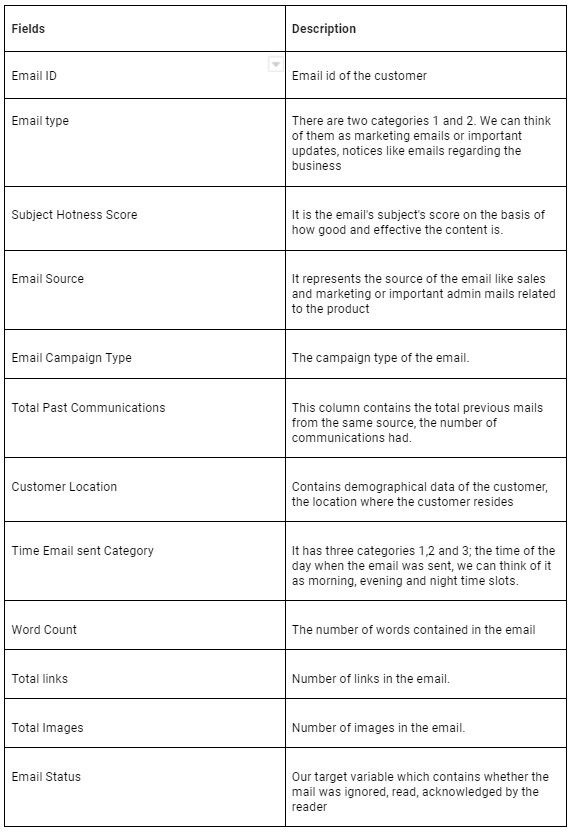

## **Approach:**

Our goal in this project is to predict whether a mail sent to a client will be ignored, read or acknowledged based on the different attributes that have been provided.

Performing Exploratory data analysis will help us understand the features and relationships that they have and their impact on the target or the client's responce. We will try to find out important features and we will do feature engineering.

Data is labeled and the target column being categorical, we shall implement classification based machine learning algorithms to complete the prediction task.

## **Data Collection & Summary:**

Very first step is to import the libraries for the task. We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.

In [1]:
#invite people for the party
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr # Pearson's r

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime, timezone, timedelta


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #Support vector classifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [2]:
sns.set(font_scale = 1.5)

In [3]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing SMOTE for oversampling and NearMiss for undersampling

In [4]:
# importing SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Nearmiss for undersampling
from imblearn.under_sampling import NearMiss
# Undersampling to handle the imbalance
nm = NearMiss()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/ML Classification Projects/Email Campaign Effectiveness Prediction - Ranajay Biswas/Datasets & Resources/data_email_campaign.csv',  encoding= 'unicode_escape')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
# top 5 rows of the data
dataset.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [10]:
# last 5 rows of the data
dataset.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [11]:
# checking the shape of our data
dataset.shape

(68353, 12)

In [12]:
# checking columns
# dataset.columns.tolist()

In [13]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### *Dataset has 68353 rows and 12 columns. And it contains object, integer and float data types*...

### <b>Descriptive Stats ---

In [14]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
10%,1.000000,0.100000,1.000000,2.000000,13.000000,1.000000,352.000000,4.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
90%,2.000000,2.500000,2.000000,3.000000,46.000000,3.000000,1082.000000,21.000000,11.000000,1.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


Some numerical features look skewed. But we shall have a better idea about it during the EDA.

## **Exploratory Data Analysis:**

### *Discovering if there are any Null values in the data* ---

In [15]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 2)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat

In [16]:
missing = missing_value_checker(dataset)
missing.sort_values('observations_missing', ascending = False)

,observations_missing,percentage_missing
feature,,
Customer_Location,11595,16.96
Total_Past_Communications,6825,9.98
Total_Links,2201,3.22
Total_Images,1677,2.45
Email_ID,0,0.00
Email_Type,0,0.00
Subject_Hotness_Score,0,0.00
Email_Source_Type,0,0.00
Email_Campaign_Type,0,0.00


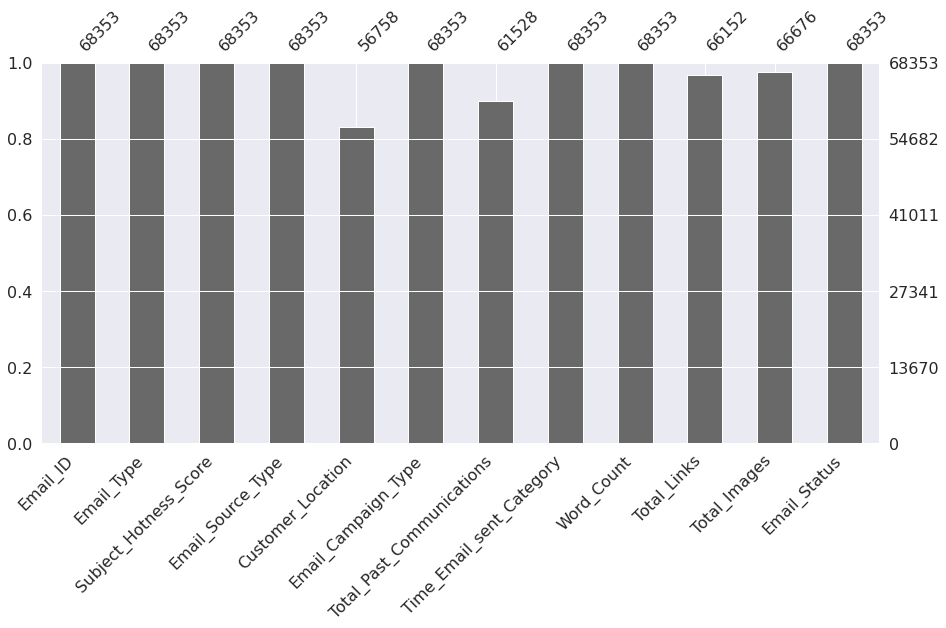

In [17]:
# plotting for null values
msno.bar(dataset, figsize = (15,7))

It shows that there are many null values in the data.. Customer Location has roughly 17%, Total_Past_Communications has 10%, Total_Links has 3.22% and Total_Images column has 2.5% null values...

### *Checking for duplicate values in the data..*

In [18]:
# duplicate
len(dataset[dataset.duplicated()])

0

 No duplicate values found in the data...

In [19]:
# making a copy of the original dataset 
df = dataset.copy()

### *Dependent Variable:*

The target or the dependent variable is 'Email_Status' and it's a categorical column containing 3 unique values- 'Ignored', 'Read', 'Acknowledged'. Let's check the occurances and the distributions.

In [20]:

df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

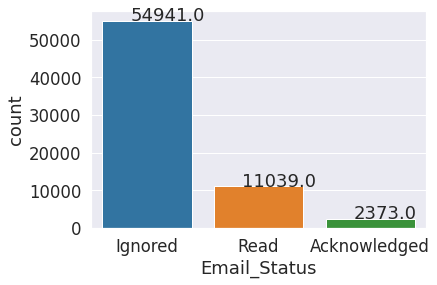

In [21]:
# visualize the target variable
g = sns.countplot(df['Email_Status'], palette = "tab10")
g.set_xticklabels(['Ignored','Read', 'Acknowledged'])
for p in g.patches:
  g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

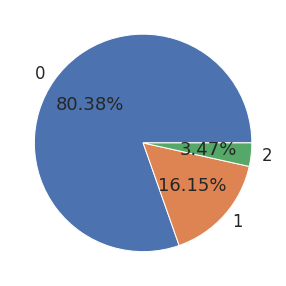

In [22]:
data = df["Email_Status"].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

Dataset is highly imbalanced. Only 3.5% of total sent emails were acknowledged. 16% were read and more than 80% were ignored.

### *Histograms of the features*:

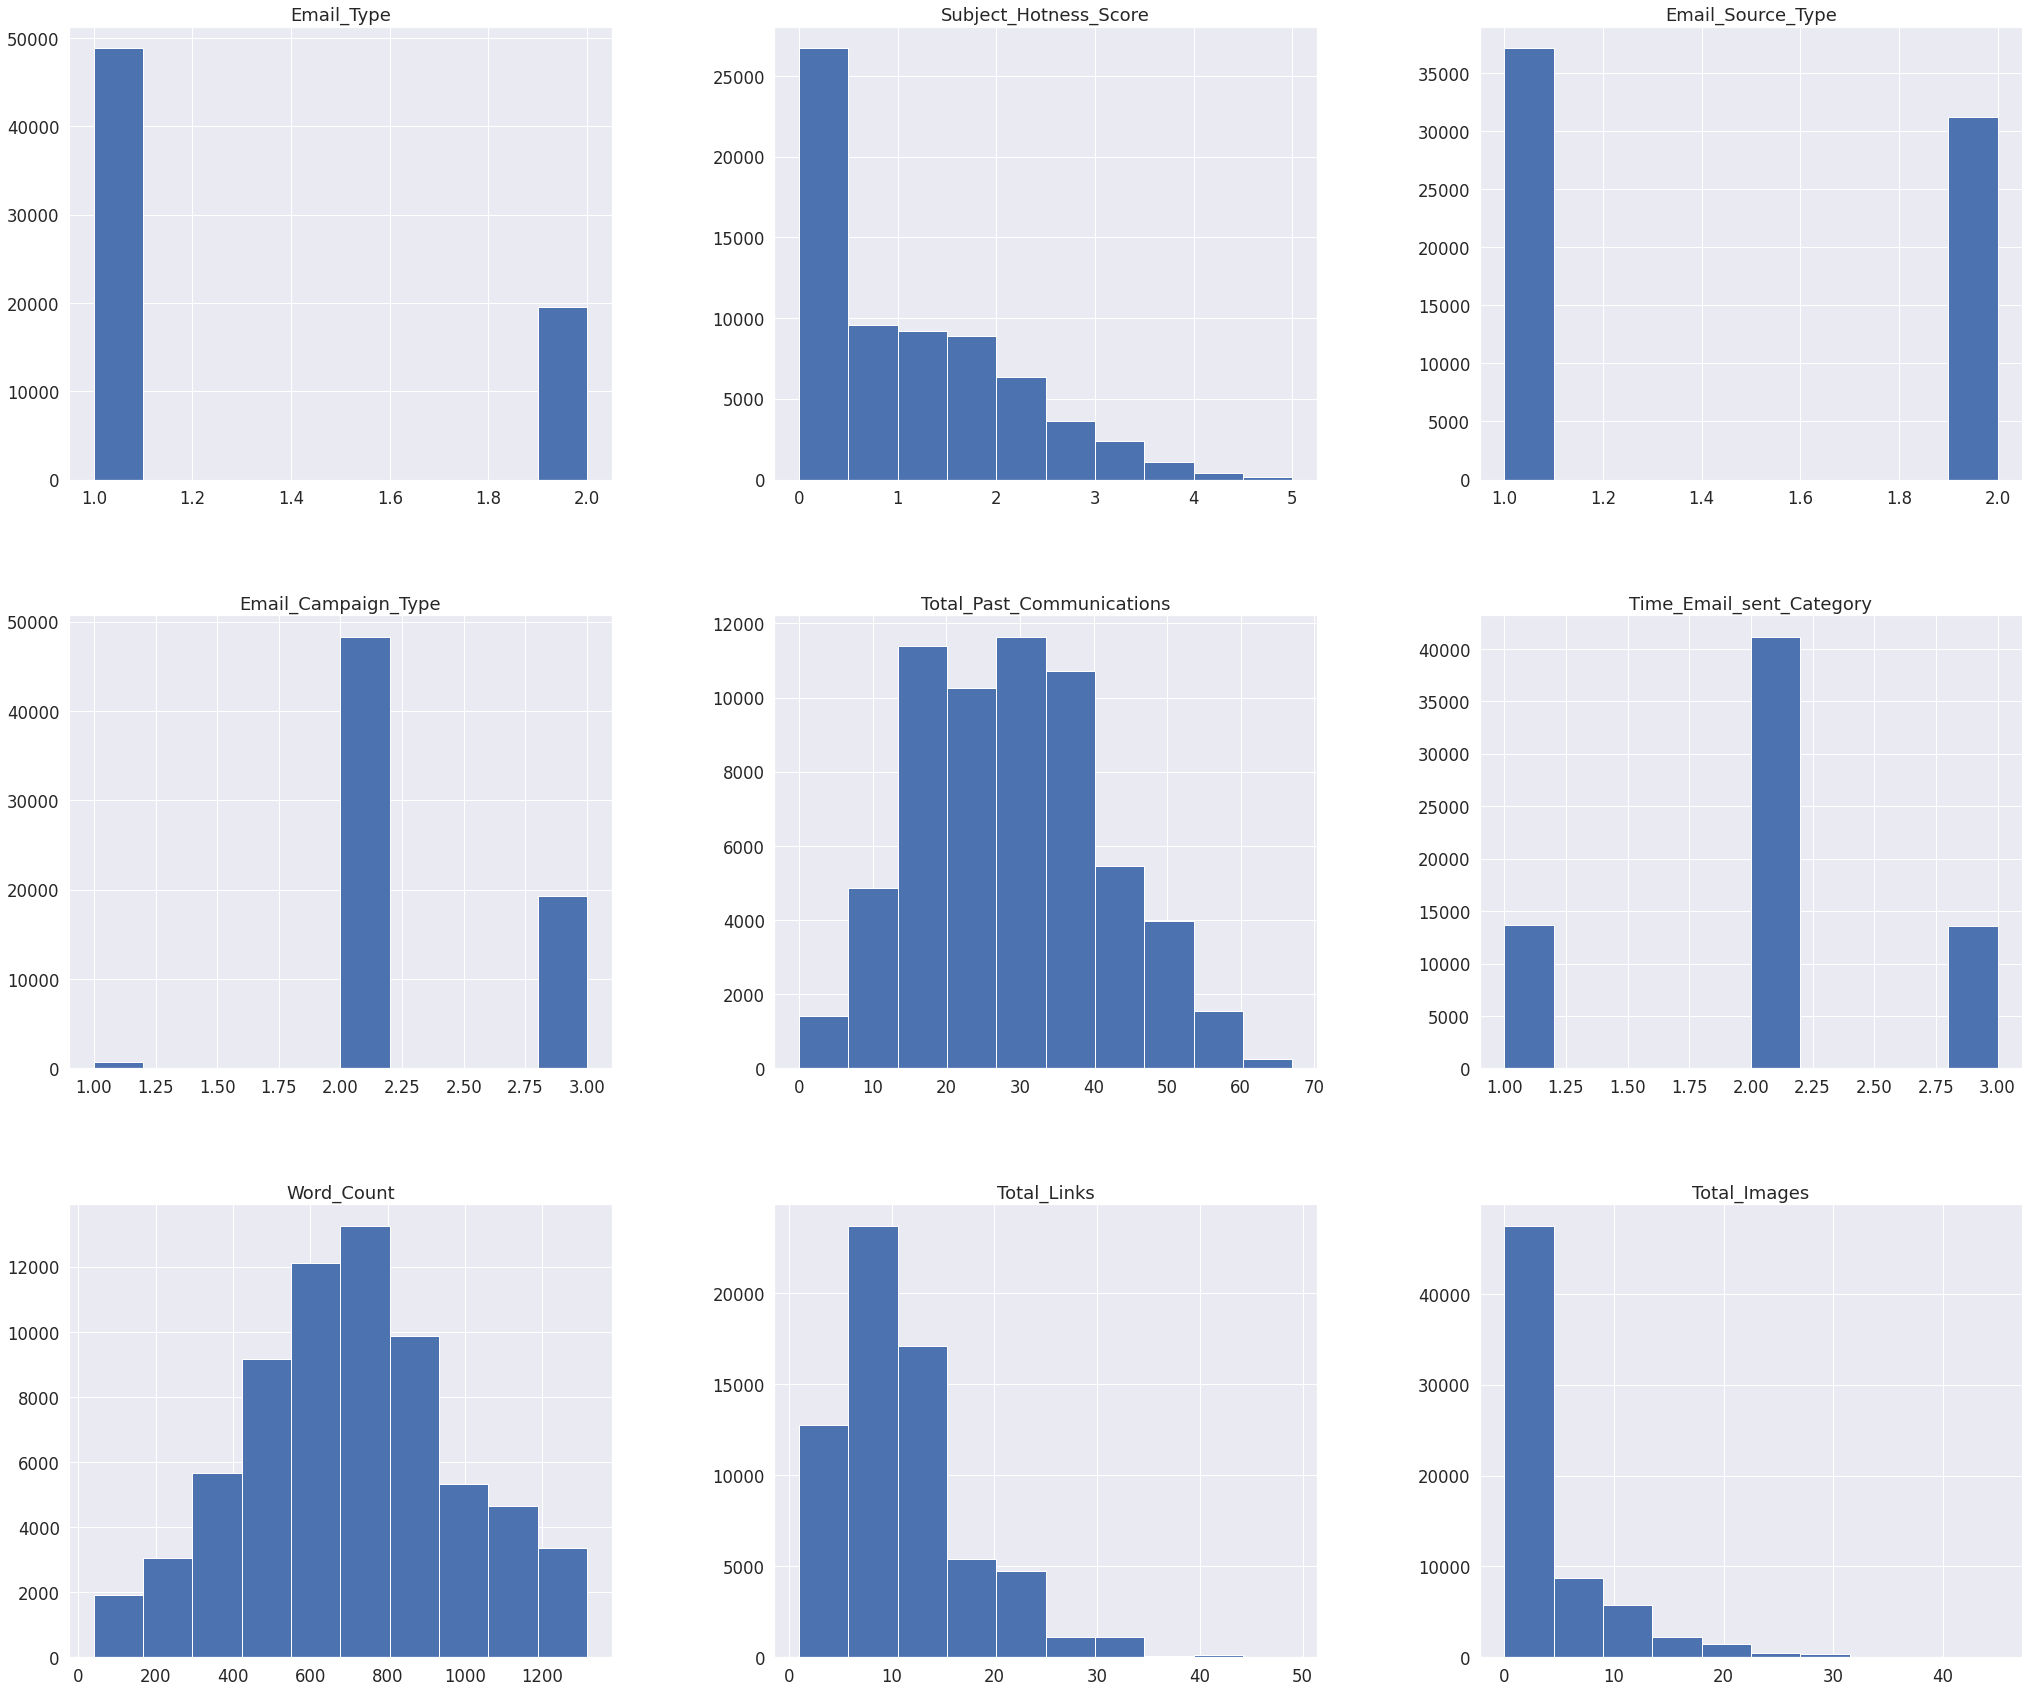

In [23]:
# Looking at the histograms of the data

df[df.drop(['Email_Status'], axis = 1).columns].hist(figsize = (35,30))
plt.show()

### *Identifying and Separating categorical columns from Numerical columns:*

**Categorical** columns in the data:

In [24]:
cat_cols = []

for col in df.columns:
  if len(df[col].unique()) < 10: # any column with less than ten unique values
    cat_cols.append(col)

print(f'We have {len(cat_cols)} categorical columns in the data, which are - {cat_cols}')

We have 6 categorical columns in the data, which are - ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']


Since, 'Email_Status' is the target, we are dropping that column from our categorical features list.

In [25]:
cat_cols.remove('Email_Status')

So, we are left with only 5 categorical features. Let's check these unique values in the categorical columns:

### Analysis of Categorical features:

In [26]:
def get_unique_values(dataframe, cat_features):
  
  '''takes a dataframe and a list of categorical feature names as input and
  returns a Dictionary{} containing the name of the column
  and list of unique values in each of those columns'''

  unique_vals = {}
  for i in cat_features:
    if i in dataframe.columns:
      unique_vals[i] = list(dataframe[i].unique())

  return (unique_vals)

Unique values in the Independent categorical features -

In [27]:
get_unique_values(df, cat_cols)

{'Email_Type': [1, 2],
 'Email_Source_Type': [2, 1],
 'Customer_Location': ['E', nan, 'B', 'C', 'G', 'D', 'F', 'A'],
 'Email_Campaign_Type': [2, 3, 1],
 'Time_Email_sent_Category': [1, 2, 3]}

In [28]:
def catcountplot(data, x_col, y_col, y_labels, perc = 0, color = 'hls'):

  '''Function that will plot the count plots for the indepedent feature
      and separately and also based on the categorical target column.
      Takes 'perc = 1' for plotting of percentage count'''

  plt.figure(figsize=(12,7))
  # sns.color_palette("tab10")

  # Distribution of Independent column
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(25,8), constrained_layout=True)
  sns.countplot(data[x_col],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {x_col}")
  
  # Distribution of Independent col based on Dependent col 
  # plt.figure(figsize=(12,7))
  sns.countplot(x=data[x_col], hue=data[y_col], data=pd.melt(data) , palette = color, ax=ax[1])
  ax[1].set_title(f"{x_col} vs {y_col}")
  plt.ylabel("Count of Observations")
  plt.legend(y_labels)
  total = float(len(data))
  if perc == 1:
    for p in ax[1].patches:
      percentage = '{:.1f}%'.format(100* p.get_height().round(2)/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax[1].annotate(percentage, (x, y), ha="center",va="bottom")
  fig.show()

**Customer Location vs Email Status:**

<Figure size 864x504 with 0 Axes>

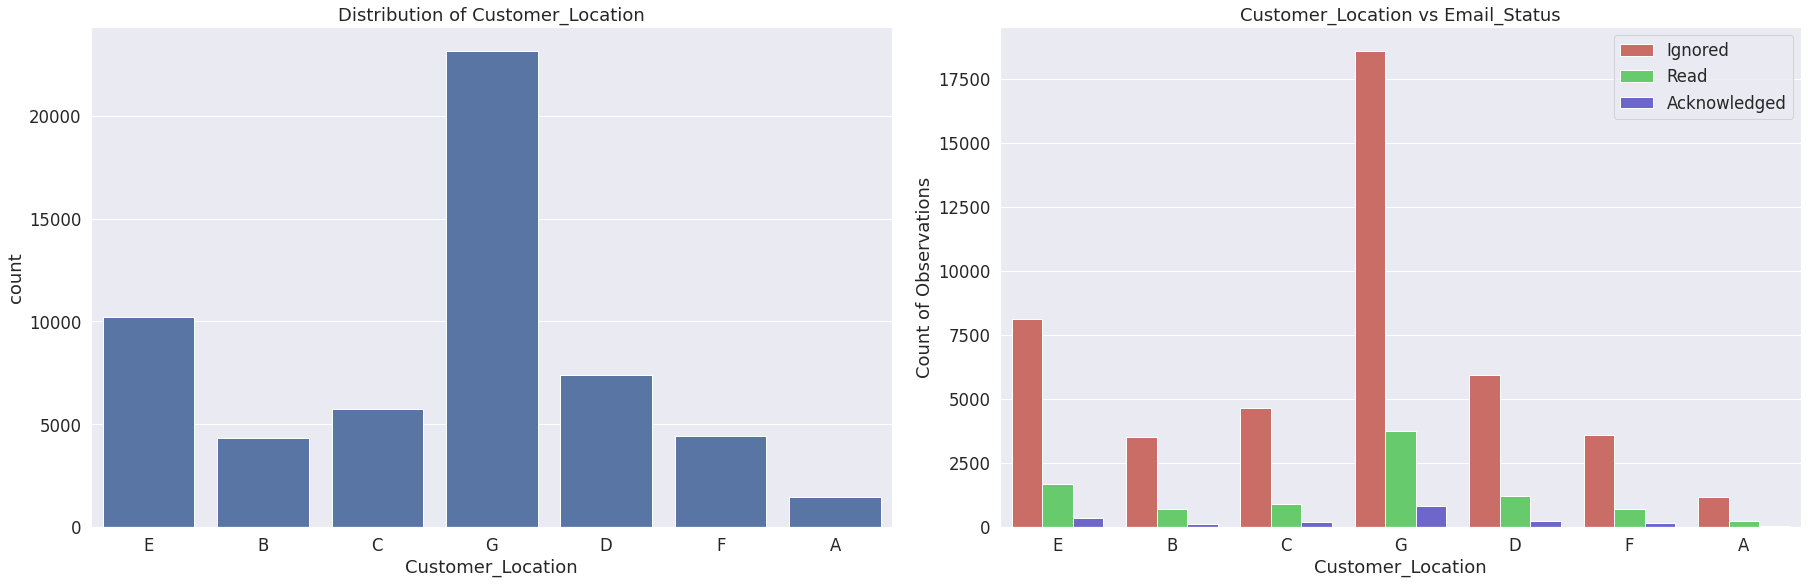

In [29]:
catcountplot(df, 'Customer_Location', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Regardless of the demographic, the class label distribution for the dependent column is similar. So, we can say that 'Customer_Location' does not have any strong relationship with the client's response or the 'Email_Status' column.

<B>Email_Campaign_Type vs Email_status:

<Figure size 864x504 with 0 Axes>

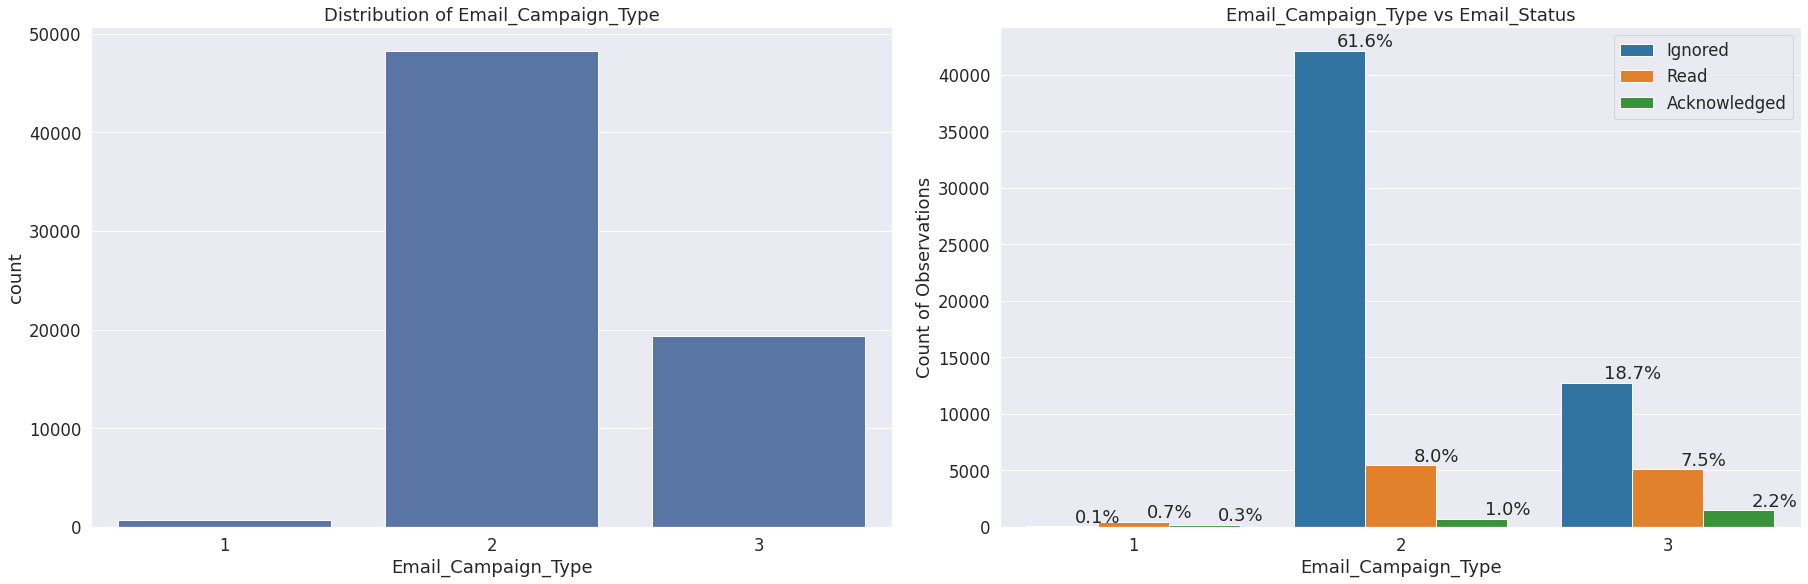

In [30]:
catcountplot(df, 'Email_Campaign_Type', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1, 'tab10')

* Among the 3 different Email Campaign Types, type1 has been sent the least (close to 1%) 

* Email campaign type 2 seems to have been sent the most and more than 60% percent of the ignored mails come from this category.

<B>Email_Type vs Email_Status:

<Figure size 864x504 with 0 Axes>

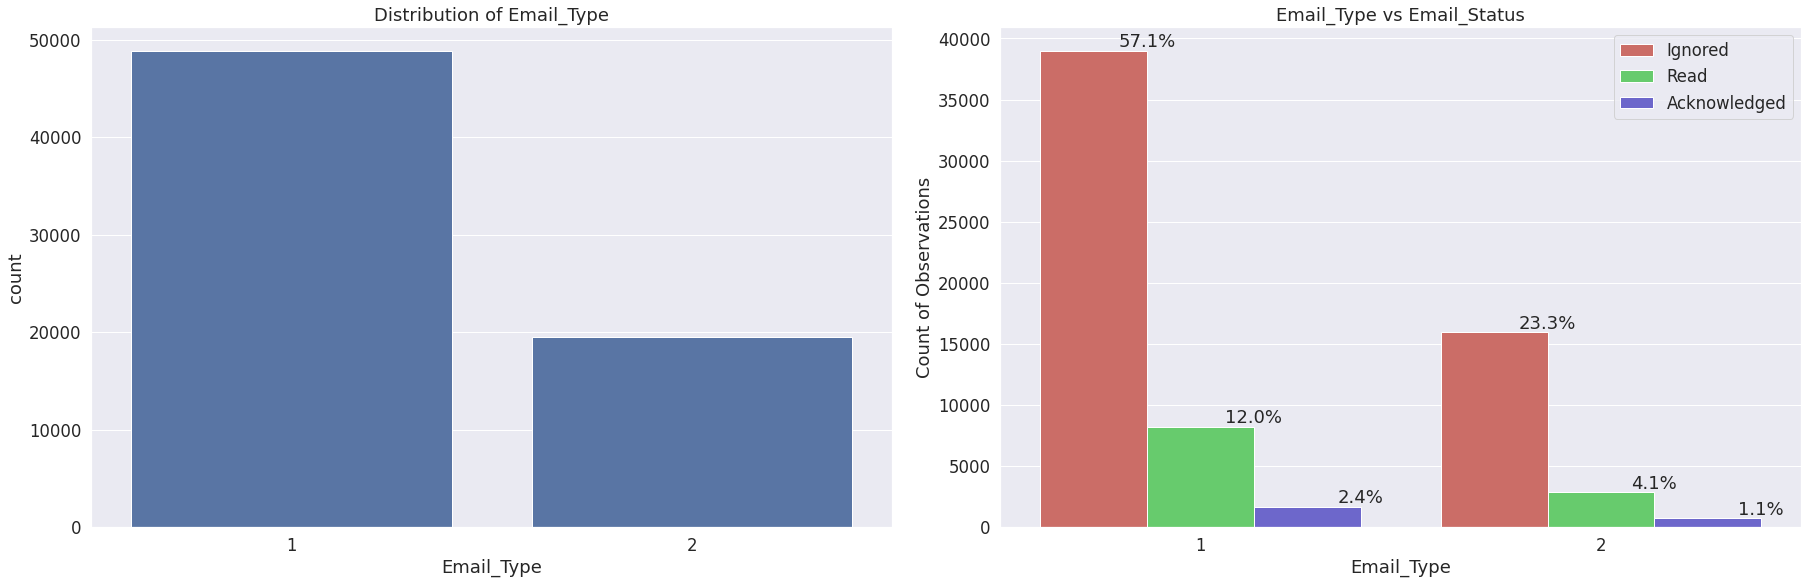

In [31]:
catcountplot(df, 'Email_Type', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1)

There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business. Email Type 1 was sent to more clients compared to Type 2.

<b>Time_Email_sent_Category vs Email_Status:

<Figure size 864x504 with 0 Axes>

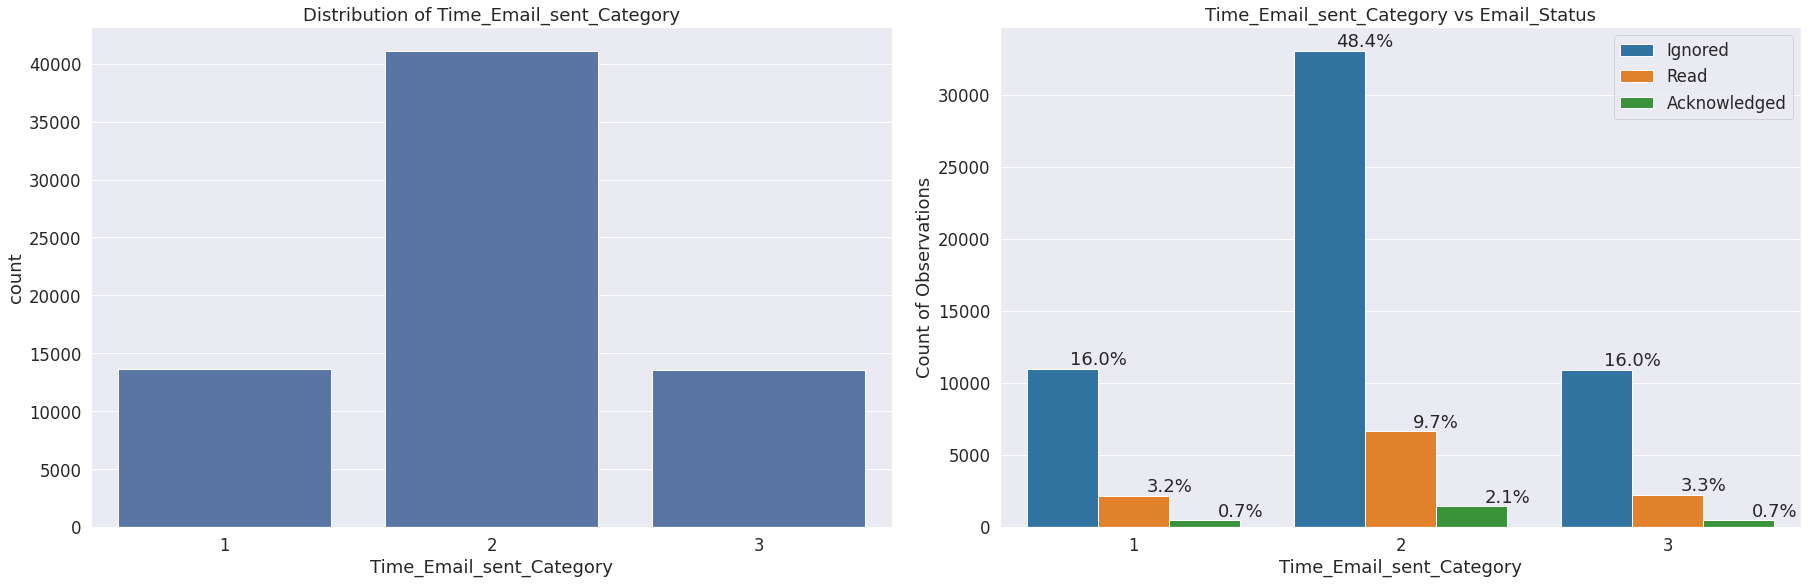

In [32]:
catcountplot(df, 'Time_Email_sent_Category', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1, 'tab10')

Time_Email_sent_Category has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

* More people received emails during the evening.
* Though this feature does not seem to have much of an impact on the client's responce. 

### Analysis of Numerical Features:


In [33]:
# numeric columns
num_cols = [i for i in df.describe().columns if i not in cat_cols and i != 'Email_Status']

In [34]:
print(f'The numerical columns in the data are : {num_cols}')

The numerical columns in the data are : ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']


Let's check the distributions, outlier presence in the data and also their relations with the dependent column

In [35]:
def numdistplot(data, x_col, y_col, y_labels, color = 'hls'):

  '''Plots 3 plots - 
      1. Distribution plot of the independent continuous feature
      2. A boxplot for the feature
      3. Boxplot comparing features distribution for different target class labels'''

  # plt.figure(figsize=(12,7))
  # sns.color_palette("tab10")

  # Distribution of Independent column
  fig, ax = plt.subplots(1, 3, figsize=(25,8), constrained_layout=True)
  sns.distplot(data[x_col],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {x_col}")
  
  # plt.figure(figsize=(12,7))
  sns.boxplot(x=data[x_col], ax=ax[1])
  ax[1].set_title(f"Boxplot for {x_col}")

  # Independent col based on Dependent col 
  sns.boxplot(x=data[y_col], y =data[x_col], data=pd.melt(data) , palette = color, ax=ax[2])
  ax[2].set_title(f"{x_col} vs {y_col}")
  # plt.ylabel("Count of Observations")
  plt.xlabel(f'Email_Status: {y_labels}')
  fig.show()

<b>Subject_Hotness_Score:

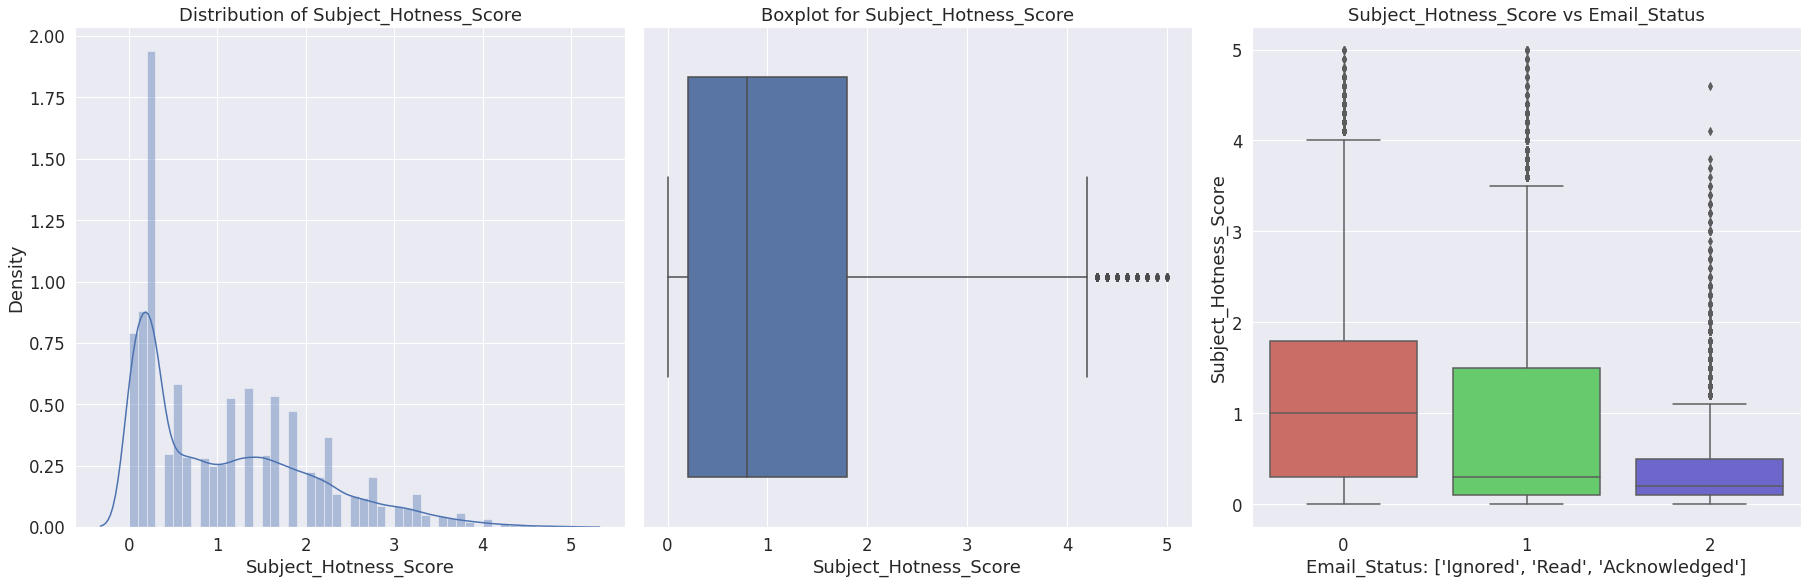

In [36]:
numdistplot(df, 'Subject_Hotness_Score', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

 It is the email's subject's score on the basis of how good and effective the content is.

 * The feature is right skewed.
 * For all three class labels, it has outliers.

<b>Total_Past_Communications:

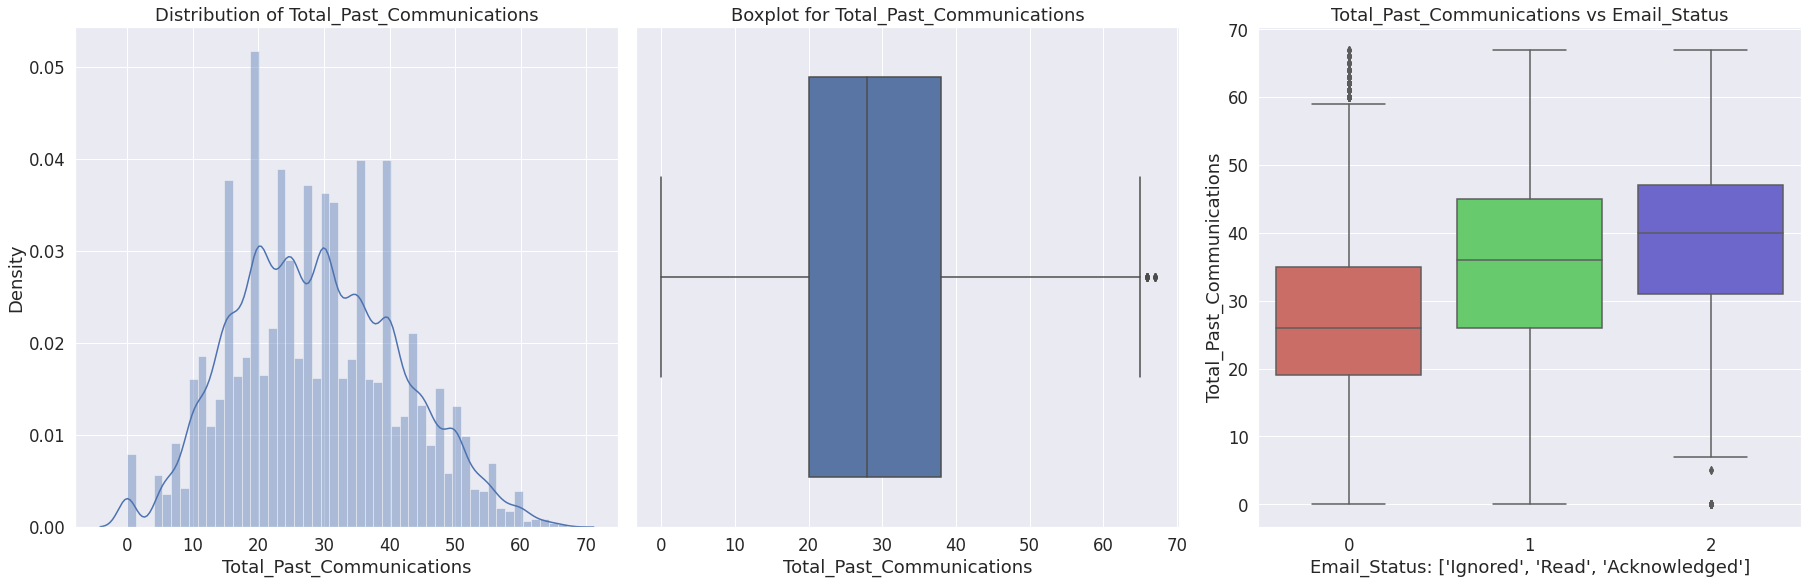

In [37]:
numdistplot(df, 'Total_Past_Communications', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

This column contains the total previous mails from the same source, the number of communications had.

* The distribution is slightly positive skewed.
* From the boxplots, we can see that more acknowledgements were received from the clients who were previously contacted more.

<b>Word_Count:

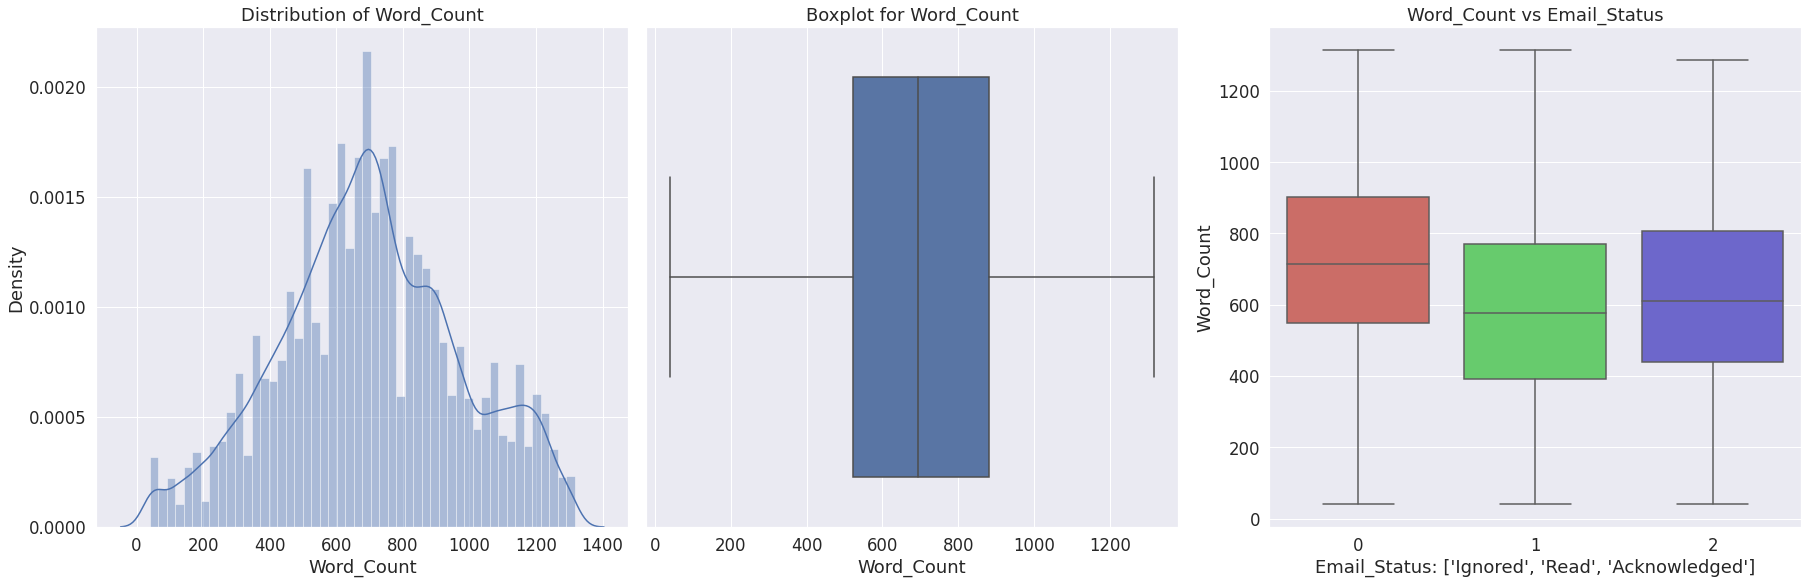

In [38]:
numdistplot(df, 'Word_Count', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

The number of words contained in the email.
* Distribution for this feature follows more like a normal distribution.

<b>Total_Links:

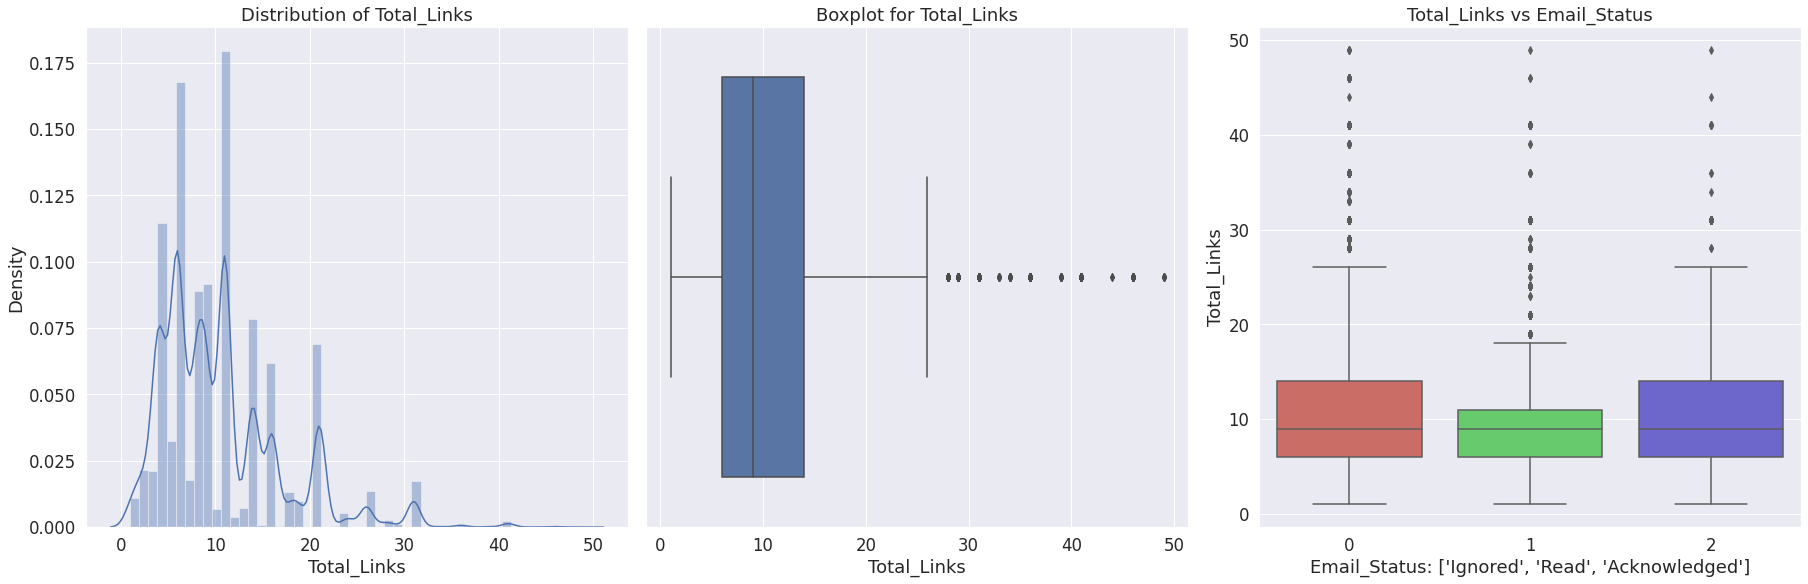

In [39]:
numdistplot(df, 'Total_Links', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Gives us the idea of how many links were there in the email.

* Positively skewed distribution.
* Contains outliers for all three class labels.

<b>Total_Images:

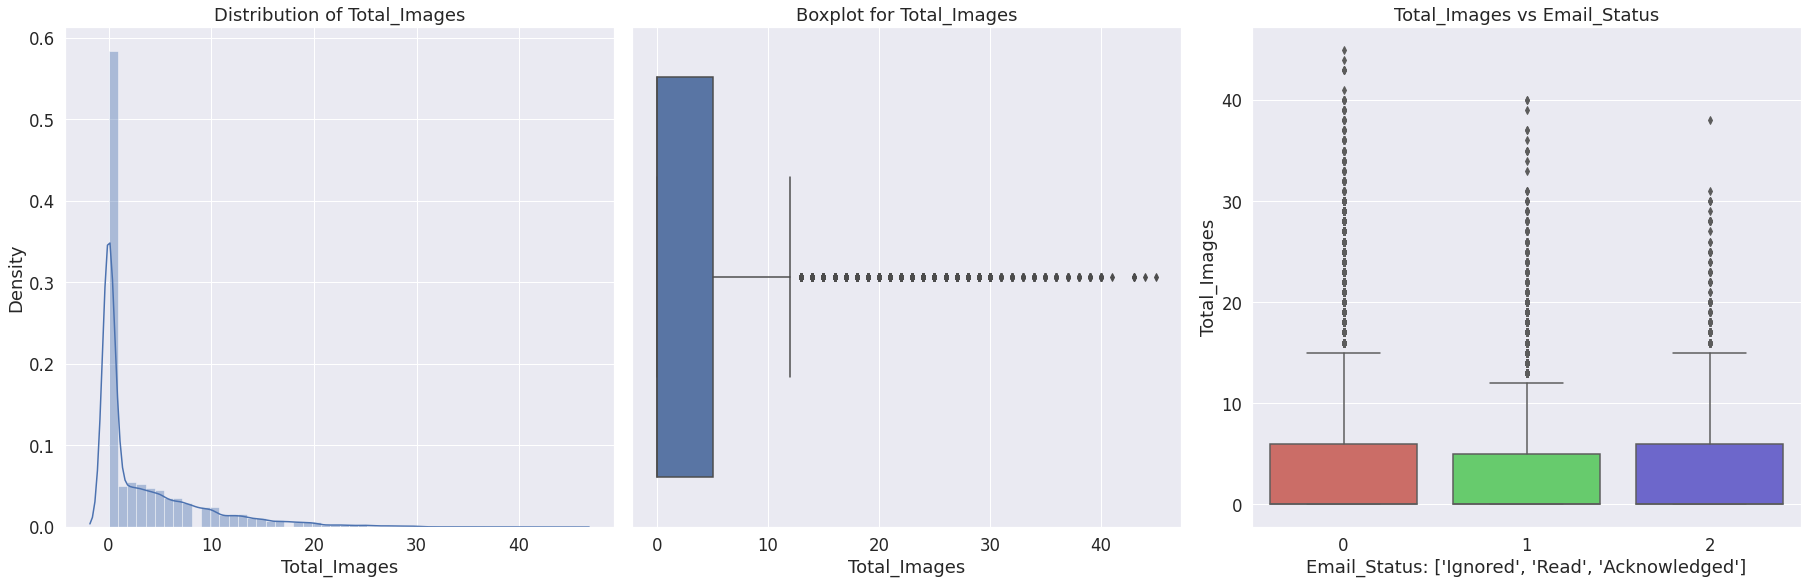

In [40]:
numdistplot(df, 'Total_Images', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Number of images in the email.

* Highly skewed towards the positive side.
* Outliers present for all the target classes.

### Multicollinearity:

Multicollinearity occurs when a change in an independent variable impacts one or more independent variables.
Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

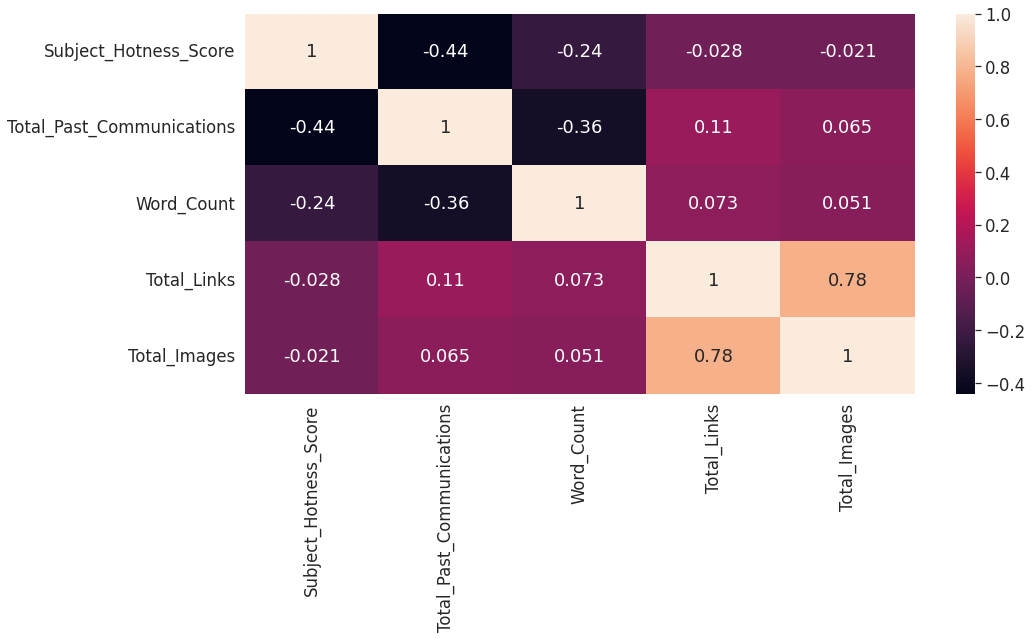

In [41]:
# multicorrelation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df[num_cols].corr(),annot=True)

We see some multicollinearity. Let's visualize them.

In [42]:
def scat(dataframe, x_axis_col, y_axis_col, dependent_hue_col, color = 'tab10'):
  
  '''' Input: 1.Dataframe
              2.column in the x axis
              3.column in the y axis
              4.dependent var(hue)

      Output: plots 2 scatterplots '''

  # plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
  fig, ax = plt.subplots(1, 2, figsize=(20,7), constrained_layout=True)


  sns.scatterplot(x=x_axis_col, y=y_axis_col, data=df, ax = ax[0])
  ax[0].set_title(f'Scatterplot between {x_axis_col} & {y_axis_col}')
  sns.scatterplot(x=x_axis_col, y=y_axis_col, hue=dependent_hue_col, palette = color, data=dataframe, ax = ax[1])
  ax[1].set_title(f"{x_axis_col} vs {y_axis_col} w.r.t {dependent_hue_col}")

### **Top 3 most noticeable multicollinear columns:**

Scatterplot between **Total_links** & **Total_Images** and the correlation value is 0.78

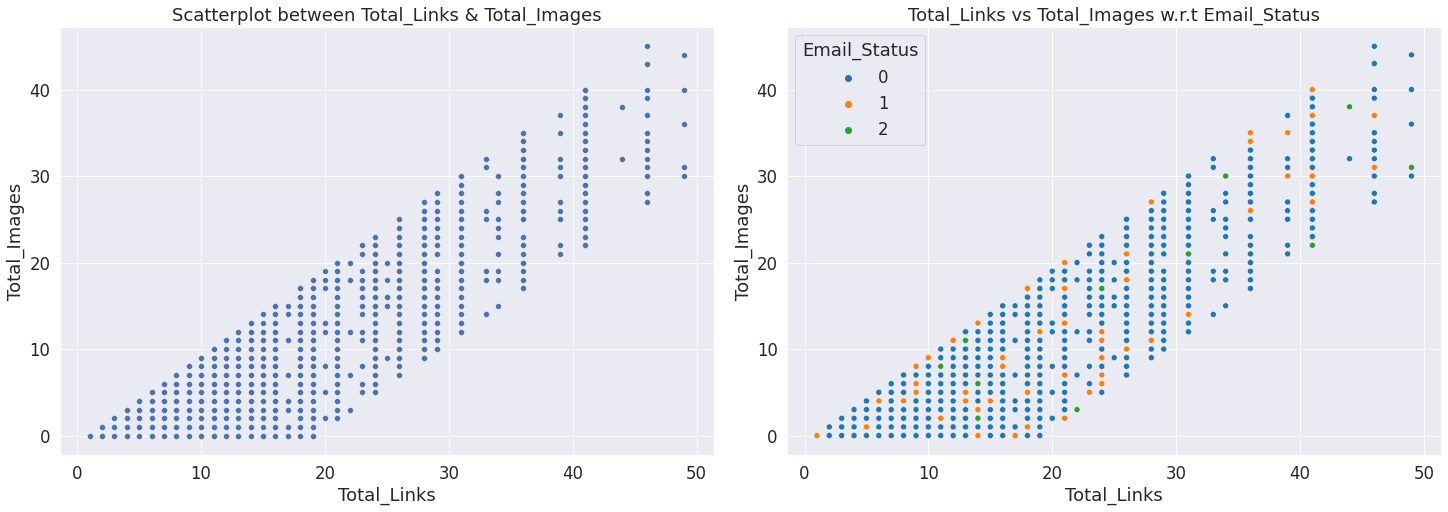

In [43]:
scat(df, 'Total_Links', 'Total_Images', 'Email_Status')

Scatterplot between **Total_Past_Communications** & **Word_Count** and the correlation value is -0.36

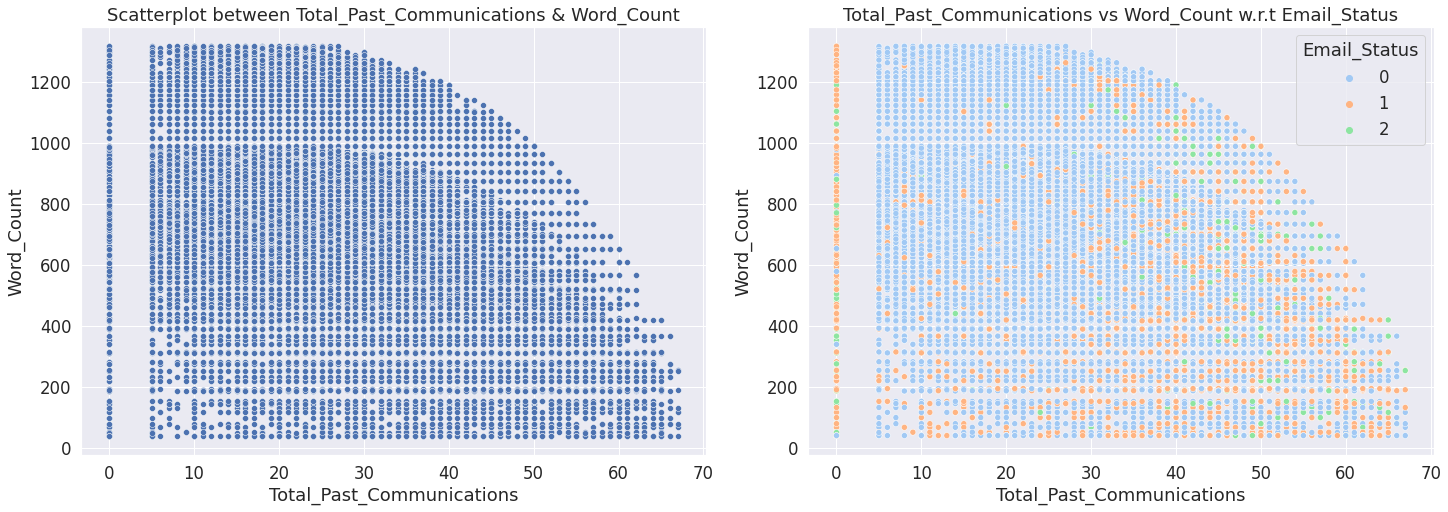

In [44]:
scat(df, 'Total_Past_Communications', 'Word_Count', 'Email_Status', 'pastel')

Scatterplot between **Total_Past_Communications** & **Subject_Hotness_Score** and the correlation value is -0.44

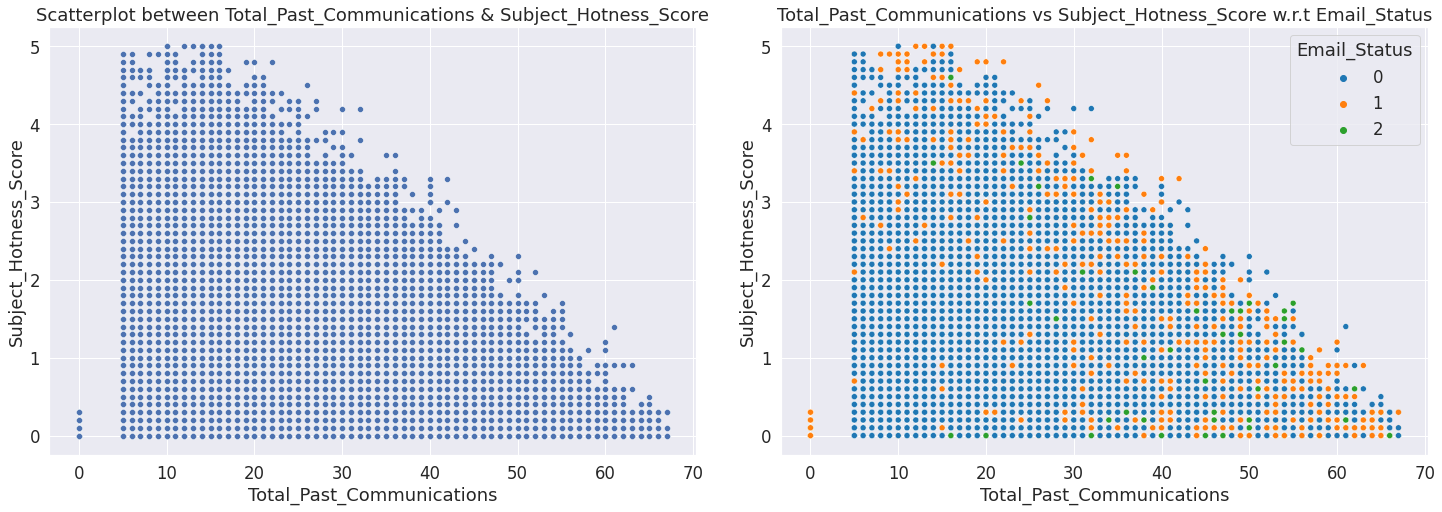

In [45]:
scat(df, 'Total_Past_Communications', 'Subject_Hotness_Score', 'Email_Status')